In [1]:
generate_data = False

In [2]:
import numpy as np
import run_continuum as run
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import scipy.signal
import scipy as scp
import scipy.io as sio

import warnings
warnings.filterwarnings('ignore')

from frictionlaws import SlipWeakeningFrictionLaw
from predictions import *

import pickle

In [3]:
x = np.linspace(0,100,10000)

if generate_data:
    # Crack fracture energy arrest:
    dt = 1e-3
    tmax = 200
    gamma = 0.0
    beta = 1e-3
    output_interval = 100
    dataBarrier = []
    x_barrier = 10
    dx = x[1]
    data = []    

    tau_all = np.logspace(-2,-.01,25)
    dc_all = np.logspace(-2,1,25)
    L_arrest = np.zeros([np.size(tau_all),np.size(dc_all)])

    for i in range(np.size(tau_all)):
        print(i)
        for j in range(np.size(dc_all)):

            tau = gauss(x,0,.1)*(1-tau_all[i]) + tau_all[i]
            tau[0]=1
            dc = (dc_all[j]-1e-10)*gauss(x,x_barrier,.001) + 1e-10
            dc[x>=x_barrier]=dc_all[j]

            # run
            data = run.run_continuum(x = x, tau = tau, tau_minus = tau+2, dt = dt, output_interval = output_interval, gamma = gamma, tmax = tmax, beta = beta, bc='fixed',frictionLaw = SlipWeakeningFrictionLaw(dc=dc,delta_u = np.zeros(np.size(x))))

            # Find L_arrest
            L_arrest[i,j] = np.max(x[np.sum(1-data['stuck'],1)>0])

    pickle.dump({'x_barrier': x_barrier, 'tau_all': tau_all, 'dc_all': dc_all, 'L_arrest': L_arrest},  open( "data/crack_fracture_energy.p", "wb" ))            

else:
    data = pickle.load( open( "data/crack_fracture_energy.p", "rb" ) )
    tau_all = data['tau_all']
    dc_all = data['dc_all']
    L_arrest = data['L_arrest']  
    x_barrier = data['x_barrier']

In [4]:
tau_all_pred = np.logspace(-2,-.01,25)
dc_all_pred = np.logspace(-2,1,25)
L_arrest_pred = np.zeros([np.size(tau_all_pred),np.size(dc_all_pred)])
x_barrier_pred = 40

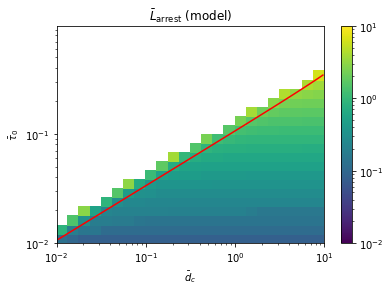

In [5]:
L = L_arrest-x_barrier
L[L_arrest>=(np.max(x)-x_barrier-1)]=-1
plt.pcolormesh(dc_all,tau_all,L,norm=colors.LogNorm(vmin=1e-2, vmax=100))
plt.colorbar()
#plt.plot(dc_all,(dc_all*gamma)**0.5,'r')
plt.yscale('log')
plt.xscale('log')
plt.title('$\\bar L_\mathrm{arrest}$ (model)')
plt.xlabel('$\\bar d_c$')
plt.ylabel('$\\bar \\tau_0$')
plt.title('$\\bar L_\mathrm{arrest}$ (model)')

tau_plot = np.logspace(-2,-.25,100)
dc_plot = (4*x_barrier/3)**2*(1-tau_plot**2)*(1-np.sqrt(1-tau_plot**2))
tau_plot = tau_plot[dc_plot<=1e1]
dc_plot = dc_plot[dc_plot<=1e1]
tau_plot = tau_plot[dc_plot>=1e-2]
dc_plot = dc_plot[dc_plot>=1e-2]

plt.plot(dc_plot,tau_plot,'r')
plt.clim([1e-2, 10])

plt.savefig('figures/arrest_length_crack_fracture_energy.eps', format='eps')


plt.show()